# **WORK IN PROGRESS**  - Current as of February 16th 2025

# Data-Git-Hub_eda.ipynb
---

## Exploring the data from the Veterans Affairs using the dataset of Veterans of the US that receive disability compensation and which state and county they reside in report year 2023:

https://catalog.data.gov/dataset/fy-2023-disability-compensation-recipients-by-county

---

## I. Introduction
The equitable distribution and accessibility of Veterans’ benefits are essential indicators of both social policy effectiveness and the overall well-being of the Veteran population across the United States. This report presents a county-level analysis of Veterans receiving VA Disability Compensation benefits at the end of fiscal year (FY) 2023, utilizing data from the Department of Veterans Affairs (VA), Office of Enterprise Integration, and the Veterans Benefits Administration (VBA). The dataset captures the total number of Veterans receiving compensation, their service-connected disability (SCD) ratings, as well as demographic factors such as age and gender. However, data suppression techniques were applied to protect the identities of individuals, leading to some missing values for specific demographic attributes. This analysis seeks to contextualize the distribution of disability compensation recipients relative to broader county-level demographic trends, urban population concentrations, and economic conditions, as measured by state-level Consumer Price Index (CPI) data for FY 2023.

To further investigate regional disparities and potential correlations between Veteran compensation rates and broader socioeconomic factors, this study will integrate external datasets, including total county population figures and major metropolitan population distributions within those counties. This approach will provide a comparative framework to assess the proportion of Veterans receiving benefits relative to the total resident population. Additionally, incorporating state-level CPI data will allow for an economic assessment of how cost-of-living variations may impact the relative adequacy of VA Disability Compensation payments in different geographic areas. Understanding these dynamics is critical for policymakers, as variations in economic conditions may influence Veterans’ financial stability and access to essential services.

This analysis will be conducted using Python within a Jupyter Notebook environment, leveraging robust data science tools for statistical modeling and geospatial visualization. Pandas will be used for structured data manipulation, while Matplotlib and Seaborn will facilitate the graphical representation of key trends. Possible utilization of geospatial patterns of VA Disability Compensation recipients will be explored using GeoPandas and Folium to develop interactive county-level heatmaps, highlighting areas of high and low benefit distribution. Furthermore, state-level CPI adjustments will be applied to evaluate compensation adequacy relative to regional economic conditions. These tools will collectively enable a comprehensive assessment of VA Disability Compensation distribution and provide actionable insights for future policy recommendations.

By synthesizing VA administrative data with broader demographic and economic indicators, this study aims to offer a multidimensional perspective on the accessibility and effectiveness of disability compensation benefits across U.S. counties. The findings will provide a valuable foundation for future research on Veterans' financial well-being and inform targeted policy interventions to enhance benefit delivery in regions with higher economic disparities.

### Background

- VA Disability Compensation Benefits: 
  The VA Disability Compensation program is designed to provide monetary support to eligible Veterans suffering from service-connected disabilities. This financial assistance helps Veterans manage medical expenses, adapt to changes in their circumstances, and maintain a stable quality of life. <br>

- Importance of Equitable Distribution and Accessibility: 
  An equitable distribution of these benefits is essential not only for individual financial stability but also for reinforcing public trust in the support systems provided by government institutions. Ensuring that benefits are accessible to all eligible Veterans—regardless of their county of residence—is critical in addressing broader issues of social and economic inequality. <br>

### Objectives

- County-Level Analysis:
  To analyze the distribution of VA Disability Compensation benefits at the county level for fiscal year (FY) 2023, providing insights into which regions receive higher or lower levels of support. <br>

- Contextualization with Demographics: 
  To integrate county demographic data—such as total population, age distribution, and the presence of major metropolitan areas—to understand how these factors relate to the distribution of benefits. <br>

- Economic Context via CPI:
  To assess how state-level economic conditions, as measured by the Consumer Price Index (CPI) for FY 2023, may influence the adequacy and impact of the compensation payments. <br>

- Geospatial Insights: 
  To utilize geospatial visualization tools (GeoPandas and Folium) for mapping and identifying spatial patterns, clusters, and outliers in the distribution of benefits, thereby highlighting potential areas for policy intervention. <br>

By addressing these objectives, this study aims to provide a comprehensive evaluation of the accessibility and effectiveness of VA Disability Compensation benefits across U.S. counties, ultimately offering data-driven insights to inform policy recommendations. <br>


## II. Research Questions

This study seeks to address the following research questions: <br>

- Demographic Correlations: <br> 
  - What are the demographic characteristics (e.g., age, gender, and service-connected disability (SCD) ratings) of Veterans receiving VA Disability Compensation? <br>
  - How do these characteristics compare to the overall county demographics? <br>
  - Are there notable differences in benefit distribution based on specific demographic subgroups? <br>

- Urban vs. Rural Impact:  <br>
  - How does the concentration of urban populations relate to the distribution of VA Disability Compensation benefits? <br>
  - Do rural counties display significantly different compensation patterns compared to urban areas? <br>
  - Can variations in urbanization and population density explain disparities in benefit allocation? <br>

- Economic Influences: <br> 
  - What is the relationship between state-level Consumer Price Index (CPI) values and the adequacy of compensation payments across counties? <br>
  - How do variations in economic conditions, as captured by CPI, influence the distribution and relative impact of benefits? <br>
  - Is there evidence that higher cost-of-living areas receive benefits that are adjusted for economic differences? <br>

- Population Proportions: <br>
  - How do total county population figures and data on major metropolitan populations influence the proportion of Veterans receiving benefits? <br>
  - Are benefits distributed in proportion to the overall county and metropolitan population sizes? <br>
  - What patterns emerge when comparing compensation data against population metrics? <br>

---

## III. Data Sources
**Title: FY 2023 Disability Compensation Recipients by County** <br>
Format: CSV <br>
Website: https://catalog.data.gov/dataset/fy-2023-disability-compensation-recipients-by-county/resource/24855f5c-09c3-45c3-a3e8-f39418a090fd <br>
License: https://creativecommons.org/publicdomain/zero/1.0/ <br>

**Title: Annual Estimates of the Resident Population for Counties in the United States: April 1, 2020 to July 1, 2023** <br>
Format: XLSX <br>
Website: https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv <br>
License: https://creativecommons.org/publicdomain/zero/1.0/ <br>

**Title: United States Cities Database: January 23, 2025** <br>
Format: CSV <br>
Website: https://simplemaps.com/data/us-cities <br>
License: https://creativecommons.org/licenses/by/4.0/ <br>

**Title: Consumer Price Index for All Urban Consumers (CPI-U): U.S. city average, by expenditure category, December 2023** <br>
Format: XLSX <br>
Website: https://www.bls.gov/cpi/tables/supplemental-files/cpi-u-202312.xlsx <br>
Licnese: License: https://creativecommons.org/publicdomain/zero/1.0/ <br>

---

## IV. Data Collection & Preparation

In this section, we load, clean, merge, and transform our datasets to prepare them for analysis. We currently have four key datasets:

1. **VA Disability Compensation Data:**  
   - File: `FY_2023_Disability_Compensation_Recipients_by_County.csv`  
   - Contains county-level data on Veterans receiving compensation, along with some demographic details (age, gender, SCD ratings).

2. **County Population Estimates:**  
   - File: `co-est2023-pop.xlsx`  
   - Provides population estimates for counties (based on 2020 census records projected through 2024).

3. County Geospatial Data: 
   - Needed for GeoPandas/Folium: (WORKING IN PROGRESS)
   - Required a shapefile or GeoJSON file that includes county boundaries. (WORK IN PROGRESS)  
   - Download U.S. county boundaries from sources from the U.S. Census Bureau’s TIGER/Line Shapefiles. (WORK IN PROGRESS) 
   - File: county_shapefile.shp (Stored in your data folder). (WORK IN PROGRESS)


### IV.A. Loading Data

We’ll use Pandas to load the CSV and Excel files and GeoPandas for the geospatial data.



In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load VA Disability Compensation Data
va_data = pd.read_csv('data/FY_2023_Disability_Compensation_Recipients_by_County.csv')

# Load County Population Estimates Data
pop_data = pd.read_excel('data/co-est2023-pop.xlsx')


### IV.B. Initial Data Inspection

Displaying the first few rows of each dataset.
- FY_2023_Disability_Compensation_Recipients_by_County.csv - VA Data

In [216]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

print("VA Data Preview:")
print(va_data.head().to_string(), "\n")

# Check for missing values in each dataset and print the full output
print("Missing values in VA Data:")
print(va_data.isna().sum().to_string(), "\n")



VA Data Preview:
  FIPS code    State County Name  Total: Disability Compensation Recipients  SCD rating: 0% to 20%  SCD rating: 30% to 40%  SCD rating: 50% to 60%  SCD rating: 70% to 90%  SCD rating: 100%  Age: 17-44  Age: 45-64  Age: 65 or older    Male  Female
0      1001  Alabama     Autauga                                     2636.0                  438.0                   283.0                   332.0                   838.0             745.0       658.0      1182.0             795.0  2159.0   477.0
1      1003  Alabama     Baldwin                                     6329.0                 1549.0                   819.0                   845.0                  1760.0            1356.0      1372.0      2045.0            2911.0  5754.0   573.0
2      1005  Alabama     Barbour                                      604.0                  104.0                    51.0                    90.0                   198.0             161.0        99.0       234.0             271.0   528.0    


Displaying the first few rows of each dataset.
- co-est2023-pop.xlsx - Population Data

In [217]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

print("Population Data Preview:")
print(pop_data.head().to_string(), "\n")

# Check for missing values in each dataset and print the full output
print("Missing values in Population Data:")
print(pop_data.isna().sum().to_string(), "\n")


Population Data Preview:
            Geographic Area       2019       2020       2021       2022       2023
0             United States  331464948  331526933  332048977  333271411  334914895
1  .Autauga County, Alabama      58809      58915      59203      59726      60342
2  .Baldwin County, Alabama     231768     233227     239439     246531     253507
3  .Barbour County, Alabama      25229      24969      24533      24700      24585
4     .Bibb County, Alabama      22301      22188      22359      21986      21868 

Missing values in Population Data:
Geographic Area    0
2019               0
2020               0
2021               0
2022               0
2023               0 



### IV.C. Data Cleaning

Next, we examine and clean our datasets—addressing missing values, data suppression, and standardizing column names for easier merging.

- VA Dataset

In [218]:
# Standardize column names: convert to lower case and remove extra spaces
va_data.columns = va_data.columns.astype(str).str.lower().str.strip()

# Optionally, fill missing values in specific columns (for example, 'age' and 'gender')
va_data_cleaned = va_data.fillna({'age': 'Unknown', 'gender': 'Unknown'})

# Display the cleaned column names for verification
print("Cleaned VA Data Columns:")
print(va_data_cleaned.columns.tolist(), "\n")

# Final preview of the cleaned VA data
print("Cleaned VA Data Preview:")
print(va_data_cleaned.head().to_string(), "\n")


Cleaned VA Data Columns:
['fips code', 'state', 'county name', 'total: disability compensation recipients', 'scd rating: 0% to 20%', 'scd rating: 30% to 40%', 'scd rating: 50% to 60%', 'scd rating: 70% to 90%', 'scd rating: 100%', 'age: 17-44', 'age: 45-64', 'age: 65 or older', 'male', 'female'] 

Cleaned VA Data Preview:
  fips code    state county name  total: disability compensation recipients  scd rating: 0% to 20%  scd rating: 30% to 40%  scd rating: 50% to 60%  scd rating: 70% to 90%  scd rating: 100%  age: 17-44  age: 45-64  age: 65 or older    male  female
0      1001  Alabama     Autauga                                     2636.0                  438.0                   283.0                   332.0                   838.0             745.0       658.0      1182.0             795.0  2159.0   477.0
1      1003  Alabama     Baldwin                                     6329.0                 1549.0                   819.0                   845.0                  1760.0            

- Population Dataset

In [219]:
# Load the Population Data using the first row as header
pop_data = pd.read_excel('data/co-est2023-pop.xlsx', header=0)

# Standardize column names: convert to lower case and remove extra spaces
pop_data.columns = pop_data.columns.astype(str).str.lower().str.strip()

# Display the cleaned column names and preview data
print("Cleaned Population Data Columns:")
print(pop_data.columns.tolist(), "\n")

print("Cleaned Population Data Preview:")
print(pop_data.head().to_string(), "\n")

# Define a function to clean the "geographic area" column
def split_geographic_area(geo):
    # Remove a leading period, if present
    geo = geo.lstrip('.')
    # If a comma is present, split into two parts
    if ',' in geo:
        parts = geo.split(',')
        # Trim whitespace from both parts
        sub_state = parts[0].strip()  # Renamed from county to sub_state
        state = parts[1].strip()
    else:
        # For entries without a comma (e.g., "United States"), assign accordingly
        sub_state = None
        state = geo.strip()
    return pd.Series([sub_state, state])

# Apply the function to the 'geographic area' column to create new 'sub_state' and 'state' columns
pop_data[['sub_state', 'state']] = pop_data['geographic area'].apply(split_geographic_area)

# Optional: If you no longer need the original 'geographic area' column, you can drop it:
# pop_data = pop_data.drop(columns=['geographic area'])

# Display a preview of the modified DataFrame
print("Modified Population Data Preview:")
print(pop_data[['sub_state', 'state']].head().to_string(), "\n")


Cleaned Population Data Columns:
['geographic area', '2019', '2020', '2021', '2022', '2023'] 

Cleaned Population Data Preview:
            geographic area       2019       2020       2021       2022       2023
0             United States  331464948  331526933  332048977  333271411  334914895
1  .Autauga County, Alabama      58809      58915      59203      59726      60342
2  .Baldwin County, Alabama     231768     233227     239439     246531     253507
3  .Barbour County, Alabama      25229      24969      24533      24700      24585
4     .Bibb County, Alabama      22301      22188      22359      21986      21868 

Modified Population Data Preview:
        sub_state          state
0            None  United States
1  Autauga County        Alabama
2  Baldwin County        Alabama
3  Barbour County        Alabama
4     Bibb County        Alabama 



### IV.D. Necessary Data Suppression

#### IV.D.1. Suppression of Connecticut from Research

For this study, it is crucial that the data sources we use align in terms of geographical granularity. The VA Disability Compensation data is provided at the **county level**, meaning each county's data is recorded separately. On the other hand, the Census population data for Connecticut is aggregated at a **regional level** rather than by individual counties. This mismatch in the level of detail (county vs. regional) makes it challenging to accurately compare or merge these two datasets for Connecticut.

To maintain consistency in our analysis, we have decided to **suppress** data for Connecticut. By removing Connecticut from both the VA data and the Population data, we ensure that our comparisons and insights are based on compatible, county-level data across all states included in the analysis.

In [220]:
# Filter Out Rows Where 'state' is "Connecticut" in Both Datasets

va_data_filtered = va_data_cleaned[va_data_cleaned['state'].str.lower() != 'connecticut']
pop_data_filtered = pop_data[pop_data['state'].str.lower() != 'connecticut']

#    For Population Data: After row 310 (i.e., rows 311 to 315) to show the exclusion of "Connecticut"
#    For VA Data: After row 309 (i.e., rows 310 to 314)to show the exclusion of "Connecticut"

print("Population Data: Next 5 rows after row 308 (rows 308 to 313):")
print(pop_data_filtered.iloc[308:313].to_string(), "\n")

print("VA Data: Next 5 rows after row 304 (rows 304 to 309):")
print(va_data_filtered.iloc[305:310].to_string(), "\n")

Population Data: Next 5 rows after row 308 (rows 308 to 313):
                  geographic area    2019    2020    2021    2022    2023          sub_state     state
308        .Weld County, Colorado  328987  331458  339897  350266  359442        Weld County  Colorado
309        .Yuma County, Colorado    9981    9971    9925    9895    9862        Yuma County  Colorado
319        .Kent County, Delaware  181858  182315  185043  187758  189789        Kent County  Delaware
320  .New Castle County, Delaware  570713  570918  572029  575254  578592  New Castle County  Delaware
321      .Sussex County, Delaware  237375  238629  247809  256447  263509      Sussex County  Delaware 

VA Data: Next 5 rows after row 304 (rows 304 to 309):
    fips code     state county name  total: disability compensation recipients  scd rating: 0% to 20%  scd rating: 30% to 40%  scd rating: 50% to 60%  scd rating: 70% to 90%  scd rating: 100%  age: 17-44  age: 45-64  age: 65 or older    male  female
305      8119 

#### IV.D.2. Removing Unwanted Terms from the `sub_state` Column

In our Population data, the `sub_state` column contains administrative descriptors such as "parish", "county", "borough", "census area", and "municipality". These terms can interfere with our analysis by introducing inconsistencies in the naming conventions.

To clean this column, we will:
- Use a regular expression (regex) to match any of the unwanted terms, regardless of case.
- Replace any occurrence of these terms with an empty string.
- Trim the resulting string to remove any extra whitespace.

This will standardize the `sub_state` names and ensure that only the relevant part of the name remains.


In [221]:
# Define the regex pattern for the unwanted terms.
pattern = r'\b(parish|county|borough|census area|municipality)\b'

# Use .loc to update the 'sub_state' column in pop_data_filtered to avoid SettingWithCopyWarning.
pop_data_filtered.loc[:, 'sub_state'] = pop_data_filtered['sub_state'].str.replace(pattern, '', case=False, regex=True).str.strip()

# Display a preview of the cleaned 'sub_state' column.
print("Preview of cleaned 'sub_state' column:")
print(pop_data_filtered[['sub_state']].head().to_string(), "\n")


Preview of cleaned 'sub_state' column:
  sub_state
0      None
1   Autauga
2   Baldwin
3   Barbour
4      Bibb 



### IV.E. Data Merging  
- Integrate VA data with Population dataset.

- Merging VA and Population Data, and Checking for Outliers

To ensure consistency between our datasets, we merge the VA data (which contains `"state"` and `"county name"`) with the Population data (which now has `"state"` and `"sub_state"`). The merge is done on the `"state"` and `"county name"` (from the VA data) matching the `"state"` and `"sub_state"` (from the Population data).

We use a left merge and set the `indicator=True` parameter. This creates a new column `_merge` that indicates the source of each row:
- `"both"` means the row had a match in both datasets.
- `"left_only"` indicates rows from the VA data that did not find a matching row in the Population data.
- `"right_only"` (if using a different merge method) would indicate unmatched Population rows.

After merging, we extract the rows where `_merge` is not `"both"`. These rows represent the mismatches or outliers that require further inspection.


In [222]:
# Merge the VA and Population Data

merged_data = pd.merge(
    va_data_filtered, 
    pop_data_filtered, 
    left_on=['state', 'county name'],   # VA data columns (already cleaned to lower case)
    right_on=['state', 'sub_state'],      # Population data columns
    how='left', 
    indicator=True
)

# Display the counts of the merge indicator to see overall matching
print("Merge Indicator Value Counts:")
print(merged_data['_merge'].value_counts(), "\n")

# 2. Extract and Display Outliers (Unmatched Rows)

# Rows that did not have a match (i.e. _merge not equal to 'both') are potential outliers.
unmatched_rows = merged_data[merged_data['_merge'] != 'both']

print("Rows with mismatches or missing Population data:")
print(unmatched_rows[['state', 'county name', 'sub_state', '_merge']].to_string(), "\n")

Merge Indicator Value Counts:
_merge
both          3090
left_only       49
right_only       0
Name: count, dtype: int64 

Rows with mismatches or missing Population data:
                                       state                             county name sub_state     _merge
79                                    Alaska                                  Juneau       NaN  left_only
91                                    Alaska                                   Sitka       NaN  left_only
94                                    Alaska                                Wrangell       NaN  left_only
95                                    Alaska                                 Yakutat       NaN  left_only
1209                                Maryland                          Baltimore City       NaN  left_only
1590                                Missouri                          St. Louis City       NaN  left_only
1795                              New Mexico                                Dona Ana   

### IV.F. Excluding Unmatched Rows and Displaying Merged Data

After merging the VA and Population data, we identified some unmatched rows (i.e., records where `_merge` is `"left_only"`). Since we expect only about 49 unmatched records, we will now exclude these from our merged dataset. The resulting dataset will only contain rows where there was a match in both datasets (i.e., `_merge` equals `"both"`).

Finally, we display the first ten complete rows of the merged data to verify the final output. 

Most of the lines that didn't have a match have been Cities, US Territories less Puerto Rico, Puerto Rico, Other Foreign Countries, and one Unknown, which might be a header or footer information.


In [223]:
# Exclude rows where _merge is not 'both' (i.e., exclude left_only rows)
merged_complete = merged_data[merged_data['_merge'] == 'both']

# Display the first 10 complete merged rows
print("First 10 complete merged rows (where _merge == 'both'):")
print(merged_complete.head(10).to_string(), "\n")


First 10 complete merged rows (where _merge == 'both'):
  fips code    state county name  total: disability compensation recipients  scd rating: 0% to 20%  scd rating: 30% to 40%  scd rating: 50% to 60%  scd rating: 70% to 90%  scd rating: 100%  age: 17-44  age: 45-64  age: 65 or older    male  female            geographic area      2019      2020      2021      2022      2023 sub_state _merge
0      1001  Alabama     Autauga                                     2636.0                  438.0                   283.0                   332.0                   838.0             745.0       658.0      1182.0             795.0  2159.0   477.0   .Autauga County, Alabama   58809.0   58915.0   59203.0   59726.0   60342.0   Autauga   both
1      1003  Alabama     Baldwin                                     6329.0                 1549.0                   819.0                   845.0                  1760.0            1356.0      1372.0      2045.0            2911.0  5754.0   573.0   .Baldwin Coun

### IV.G. Data Transformation

#### IV.G.1. We calculate the percentage of the county's total population that receives disability compensation and round the result to two decimal places. This standardized metric is useful for comparing counties regardless of population size. <br>
In this transformation, we calculate the percentage of the county's total population that receives disability compensation. This is computed as: <br>

Disability Compensation Percentage = (Total Disability Recipients /Population (2023)) x 100 <br>

This standardized metric allows for a direct comparison across counties regardless of their population sizes.

In [224]:
# Create a copy of merged_complete to avoid SettingWithCopyWarning
merged_complete = merged_complete.copy()

# Calculate the disability compensation percentage and round to two decimal places
merged_complete.loc[:, 'disability_rate_percentage'] = (
    (merged_complete['total: disability compensation recipients'] / merged_complete['2023']) * 100
).round(2)

# Display a preview of the results
print("Preview of Disability Compensation Percentage (of total county population, rounded to 2 decimals):")
print(merged_complete[['state', 'county name', 'disability_rate_percentage']].head(10).to_string(), "\n")



Preview of Disability Compensation Percentage (of total county population, rounded to 2 decimals):
     state county name  disability_rate_percentage
0  Alabama     Autauga                        4.37
1  Alabama     Baldwin                        2.50
2  Alabama     Barbour                        2.46
3  Alabama        Bibb                        1.23
4  Alabama      Blount                        1.63
5  Alabama     Bullock                        2.00
6  Alabama      Butler                        2.46
7  Alabama     Calhoun                        2.87
8  Alabama    Chambers                        1.98
9  Alabama    Cherokee                        1.97 



## V. Exploratory Data Analysis (EDA)

### V.1. Descriptive Statistics

#### V.1.A. List of the 10 of the Highest and Lowest Population of Disabled Veterans in County and State.

Using our merged dataset, we can identify counties with the highest and lowest percentage of Disabled Veterans population.  <br>
We use the `"total: disability compensation recipients"` column (which indicates the population of Disabled Veterans) to: <br>
- **Sort the data in descending order** to find the top 10 counties with the highest percentage of Disabled Veterans. <br>
- **Sort the data in ascending order** to find the bottom 10 counties with the lowest percentage of Disabled Veterans. <br>

The output will display the corresponding `state`, `county name`, and the percentage of Disabled Veterans for each county. <br>

In [225]:
# Create a copy to avoid modifying slices
merged_complete = merged_complete.copy()

# Compute the percentage of the population that receives disability compensation
merged_complete.loc[:, 'disability_percentage'] = (
    (merged_complete['total: disability compensation recipients'] / merged_complete['2023']) * 100
).round(2)

# Sort in descending order for the top 10 counties with the highest percentage of disabled veterans
top10_percentage = merged_complete.sort_values(
    by='disability_percentage', ascending=False
).head(10)

# Sort in ascending order for the bottom 10 counties with the lowest percentage of disabled veterans
lowest10_percentage = merged_complete.sort_values(
    by='disability_percentage', ascending=True
).head(10)

print("Top 10 Counties with Highest Percentage of Disabled Veterans:")
print(top10_percentage[['state', 'county name', 'disability_percentage']].to_string(index=False), "\n")

print("Top 10 Counties with Lowest Percentage of Disabled Veterans:")
print(lowest10_percentage[['state', 'county name', 'disability_percentage']].to_string(index=False), "\n")


Top 10 Counties with Highest Percentage of Disabled Veterans:
         state county name  disability_percentage
       Georgia     Liberty                   9.74
         Texas        Bell                   9.45
North Carolina        Hoke                   9.26
         Texas    Lampasas                   9.20
       Georgia        Long                   9.10
North Carolina      Onslow                   9.05
North Carolina  Cumberland                   8.87
     Tennessee  Montgomery                   8.84
      Missouri     Pulaski                   8.73
        Kansas       Geary                   8.43 

Top 10 Counties with Lowest Percentage of Disabled Veterans:
        state      county name  disability_percentage
       Alaska      North Slope                   0.13
Massachusetts        Nantucket                   0.27
     New York         New York                   0.30
     New York            Kings                   0.31
   New Jersey           Hudson                   0.33
 

#### V.1.B. Aggregate Data by State

Another interesting transformation is to aggregate data at the state level. <br>
For each state, we can: <br>

- Sum the total disability compensation recipients across all counties. <br>
- Sum the total population (using the 2023 estimates). <br>
- Compute a state-level disability compensation rate per 1,000 residents.<br> 

This state-level aggregation can help identify which states have relatively higher or lower rates, offering insights for policymakers. <br>



In [226]:
# Aggregate data by state
state_agg = merged_complete.groupby('state').agg({
    'total: disability compensation recipients': 'sum',
    '2023': 'sum'
}).reset_index()

# Compute state-level disability rate per 1,000 residents
state_agg['state_disability_rate_per_1000'] = (
    state_agg['total: disability compensation recipients'] / state_agg['2023']
) * 1000

# Sort by the computed rate in descending order to highlight states with highest rates
state_agg_sorted = state_agg.sort_values(by='state_disability_rate_per_1000', ascending=False)

print("State-Level Aggregated Data with Disability Rate (per 1,000 residents):")
print(state_agg_sorted.head(10).to_string(), "\n")


State-Level Aggregated Data with Disability Rate (per 1,000 residents):
             state  total: disability compensation recipients        2023  state_disability_rate_per_1000
1           Alaska                                    22786.0    690818.0                       32.984086
35        Oklahoma                                   109294.0   4053824.0                       26.960717
49         Wyoming                                    15304.0    584057.0                       26.202922
39  South Carolina                                   135982.0   5373555.0                       25.305780
25         Montana                                    27895.0   1132812.0                       24.624563
0          Alabama                                   125235.0   5108468.0                       24.515178
10          Hawaii                                    34988.0   1435138.0                       24.379537
45        Virginia                                   146829.0   6136225.0       

#### V.1.C. Grouping Counties into Population Bins and Counting Disabled Veterans

##### We will now categorize each county into one of three population bins:
- Small Counties: Population < 50,000 <br>
- Medium Counties: Population between 50,000 and 200,000 <br>
- Large Counties: Population > 200,000 <br>

##### After binning the counties, we calculate:
1. Total Disabled Veterans per Bin:  <br>
   - The sum of disability compensation recipients in each category. <br>
2. Total County Count per Bin:  <br>
   - The number of counties in each category. <br>

This transformation helps understand whether disabled veterans are concentrated in small, medium, or large counties. <br>



In [227]:
# Ensure we're working on a copy to avoid SettingWithCopyWarning
merged_complete = merged_complete.copy()

# Create population bins
bins = [0, 50000, 200000, merged_complete['2023'].max() + 1]  # Upper bound adjusted
labels = ['Small', 'Medium', 'Large']

# Assign each county into a population bin
merged_complete.loc[:, 'population_bin'] = pd.cut(merged_complete['2023'], bins=bins, labels=labels, right=False)

# Group by population bin and calculate:
# - Total disabled veterans per bin
# - Count of counties per bin
population_bin_agg = merged_complete.groupby('population_bin', observed=False).agg({
    'total: disability compensation recipients': 'sum',  # Sum of veterans in each bin
    '2023': 'count'  # Count of counties in each bin
}).rename(columns={
    'total: disability compensation recipients': 'total_veterans',
    '2023': 'total_counties'
}).reset_index()

# Display the results
print("Total Disabled Veterans and County Count by Population Bin:")
print(population_bin_agg.to_string(index=False), "\n")


Total Disabled Veterans and County Count by Population Bin:
population_bin  total_veterans  total_counties
         Small        781037.0            2112
        Medium       1355592.0             640
         Large       3307992.0             338 



#### V.1.D. Plot of Grouping Counties into Population Bins and Counting Disabled Veterans

This box plot visualizes how disabled veterans are distributed across small, medium, and large counties. <br>

<Figure size 800x500 with 0 Axes>

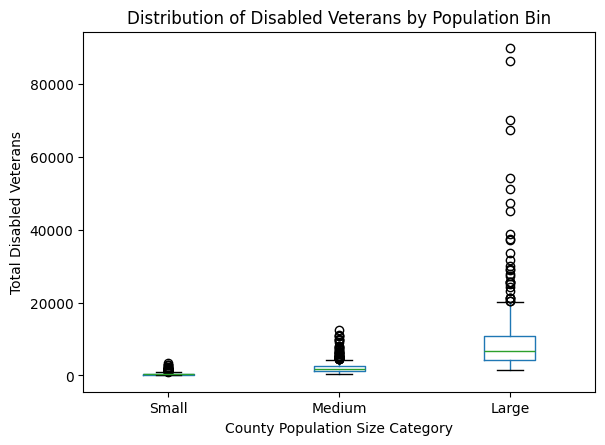

In [228]:
plt.figure(figsize=(8, 5))
merged_complete.boxplot(column='total: disability compensation recipients', by='population_bin')
plt.title("Distribution of Disabled Veterans by Population Bin")
plt.suptitle("")  # Remove default Pandas title
plt.xlabel("County Population Size Category")
plt.ylabel("Total Disabled Veterans")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

 #### V.1.E. Top 25 Counties with the Highest Percentage of Disabled Veterans per State
Count the number of times each state appears in the Top 25 highest counties. <br>

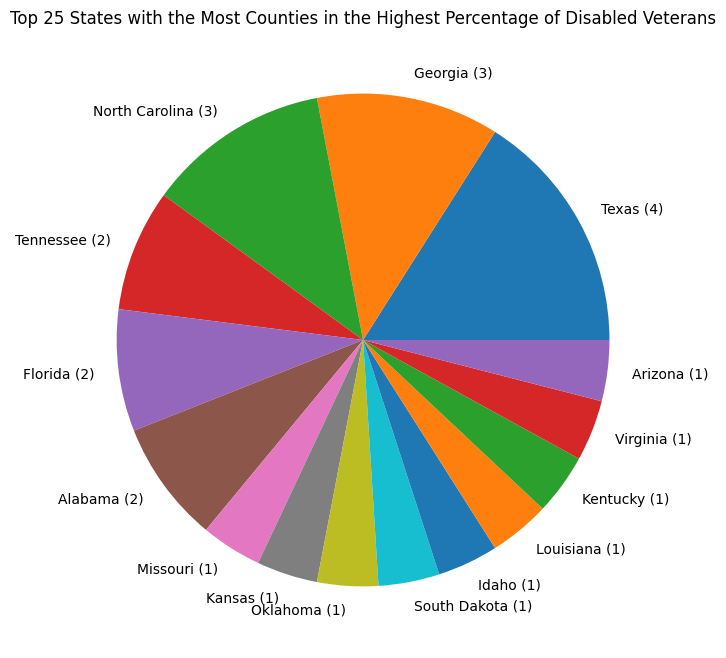

In [229]:
top_25_high = merged_complete.nlargest(25, 'disability_rate_percentage')
state_high_counts = top_25_high['state'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(state_high_counts, labels=[f"{state} ({count})" for state, count in zip(state_high_counts.index, state_high_counts.values)])
plt.title("Top 25 States with the Most Counties in the Highest Percentage of Disabled Veterans")
plt.show()

 #### V.1.F. Top 25 Counties with the Lowest Percentage of Disabled Veterans per State
Count the number of times each state appears in the Top 25 lowest counties. <br>

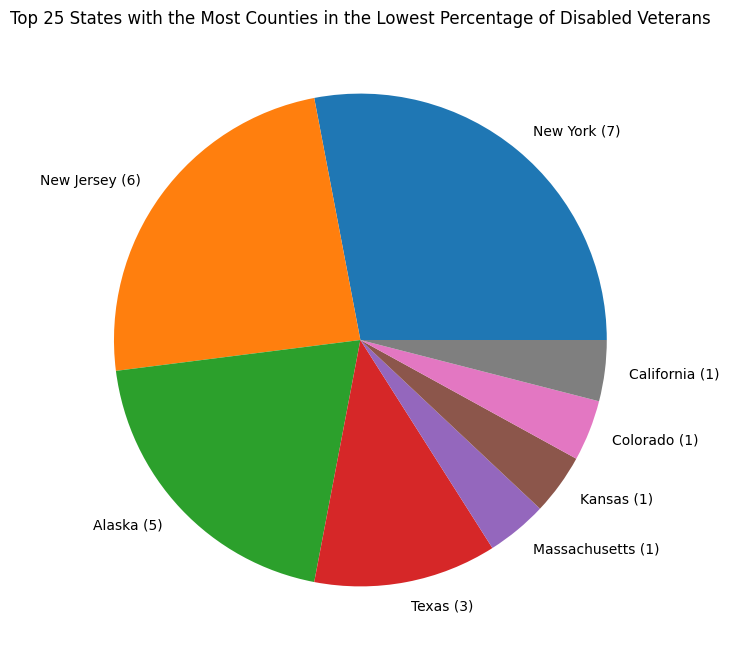

In [230]:
top_25_low = merged_complete.nsmallest(25, 'disability_rate_percentage')
state_low_counts = top_25_low['state'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(state_low_counts, labels=[f"{state} ({count})" for state, count in zip(state_low_counts.index, state_low_counts.values)])
plt.title("Top 25 States with the Most Counties in the Lowest Percentage of Disabled Veterans")
plt.show()

#### V.1.G. The Top 10 States with the Most Counties within that State


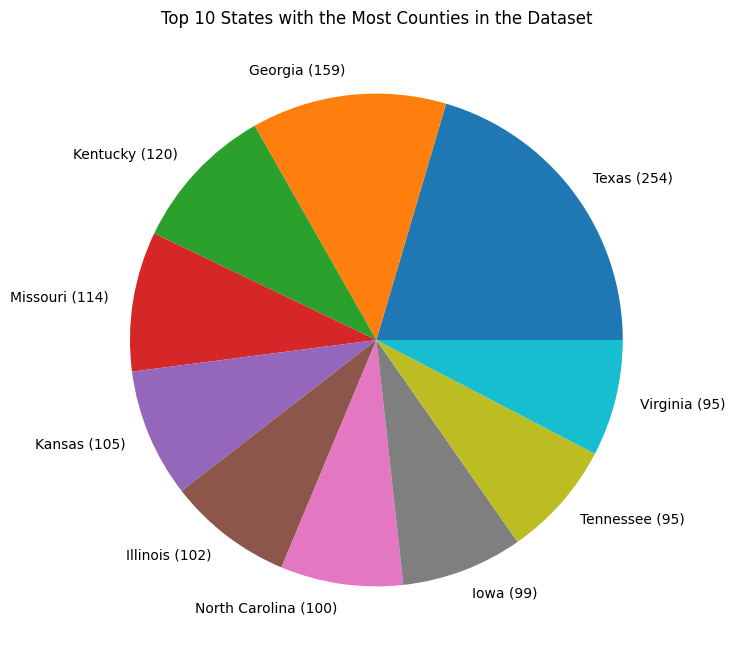

In [231]:
top_10_states = merged_complete['state'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_states, labels=[f"{state} ({count})" for state, count in zip(top_10_states.index, top_10_states.values)])
plt.title("Top 10 States with the Most Counties in the Dataset")
plt.show()

#### V.1.H. The Top 10 States with the Least Counties within that State

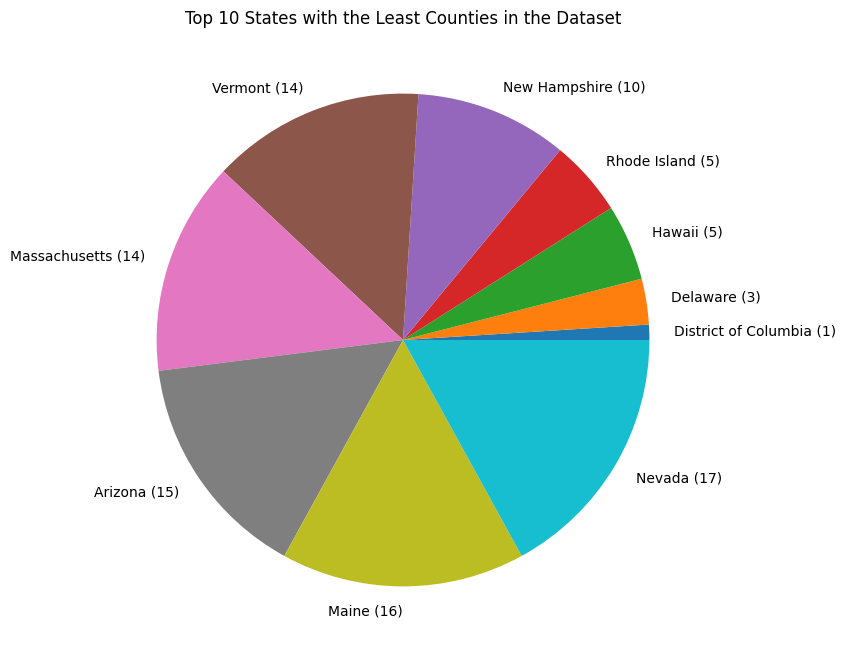

In [232]:
bottom_10_states = merged_complete['state'].value_counts().nsmallest(10)

plt.figure(figsize=(8, 8))
plt.pie(bottom_10_states, labels=[f"{state} ({count})" for state, count in zip(bottom_10_states.index, bottom_10_states.values)])
plt.title("Top 10 States with the Least Counties in the Dataset")
plt.show()

#### V.1.I. Histogram of Disability Compensation Rates Across All Counties**
This histogram visualizes the overall distribution of disability compensation rates across all counties. <br>

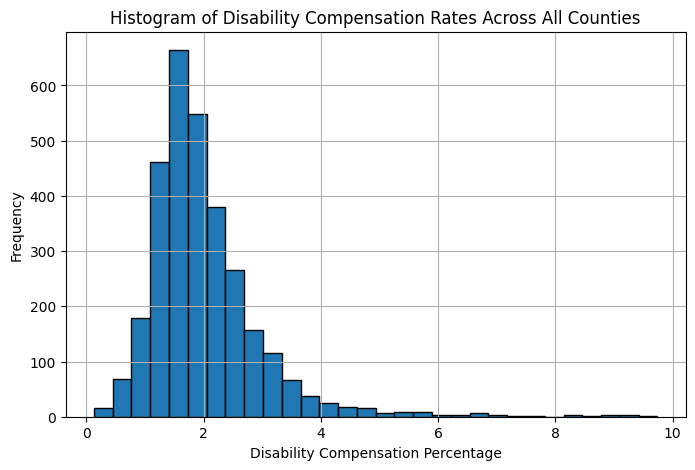

In [233]:
plt.figure(figsize=(8, 5))
plt.hist(merged_complete['disability_rate_percentage'], bins=30, edgecolor='black')
plt.title("Histogram of Disability Compensation Rates Across All Counties")
plt.xlabel("Disability Compensation Percentage")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### V.2. Comparative Analysis

#### V.2.A Comparison: Total County Population vs. Total Disability Compensation Recipients

We compare disability compensation data against Total county population to see if larger populations receive higher numbers of disability compensations. <br>


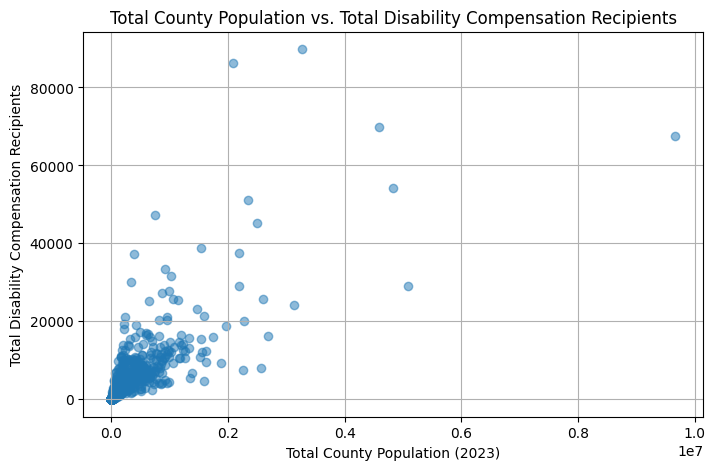

In [234]:
plt.figure(figsize=(8, 5))
plt.scatter(merged_complete['2023'], merged_complete['total: disability compensation recipients'], alpha=0.5)
plt.title("Total County Population vs. Total Disability Compensation Recipients")
plt.xlabel("Total County Population (2023)")
plt.ylabel("Total Disability Compensation Recipients")
plt.grid(True)
plt.show()

#### V.2.B Comparison: Disability Compensation Rates in Metropolitan vs. Non-Metropolitan Areas

We compare disability compensation data against Metropolitan vs. Non-Metropolitan Areas to see if urban counties have higher disability rates than rural ones. <br>

Metro vs. Non-Metro County Counts:
 is_metropolitan
0    2112
1     978
Name: count, dtype: int64 

Average Disability Compensation Percentage for Metro vs. Non-Metro Areas:
                  disability_rate_percentage
is_metropolitan                            
Non-Metro                          2.021429
Metro                              2.016074 

------------------------------------------------------------------------------------------------ 


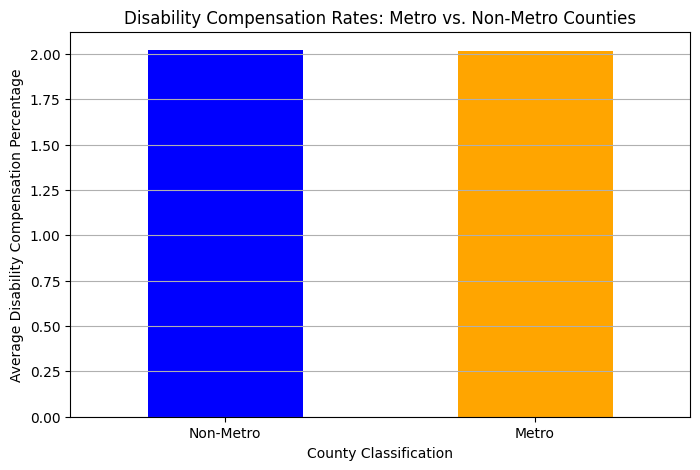

In [238]:

# Ensure we're working on a copy to avoid SettingWithCopyWarning
merged_complete = merged_complete.copy()

# -------------------------------
# 1. Create the Metro/Non-Metro Classification
# -------------------------------

# Correctly classify counties: 1 for Metro (>=50,000 population), 0 for Non-Metro (<50,000 population)
merged_complete.loc[:, 'is_metropolitan'] = (merged_complete['2023'] >= 50000).astype(int)

# Verify counts to ensure correct classification
metro_count = merged_complete['is_metropolitan'].value_counts()
print("Metro vs. Non-Metro County Counts:\n", metro_count, "\n")

# -------------------------------
# 2. Compare Disability Compensation Rates by Metro/Non-Metro Areas
# -------------------------------

# Compute the **weighted average** of disability compensation percentage by Metro/Non-Metro classification
metro_comparison = merged_complete.groupby('is_metropolitan').agg({
    'disability_rate_percentage': 'mean'  # Compute the mean disability rate percentage
}).rename(index={0: 'Non-Metro', 1: 'Metro'})

# Verify calculated averages
print("Average Disability Compensation Percentage for Metro vs. Non-Metro Areas:\n", metro_comparison, "\n")
print("------------------------------------------------------------------------------------------------ ")

# -------------------------------
# 3. Visualize the Results
# -------------------------------
plt.figure(figsize=(8, 5))
metro_comparison['disability_rate_percentage'].plot(kind='bar', color=['blue', 'orange'])
plt.xticks(rotation=0)
plt.xlabel("County Classification")
plt.ylabel("Average Disability Compensation Percentage")
plt.title("Disability Compensation Rates: Metro vs. Non-Metro Counties")
plt.grid(axis="y")
plt.show()



#### V.2.C. Correlation: Total County Population vs. Total Disability Compensation Recipients

We examine correlations between key variables to identify statistical relationships: <br>
- Correlation between total disability compensation recipients and total county population. <br>
  - Does having a larger population mean more disability compensation recipients? <br>

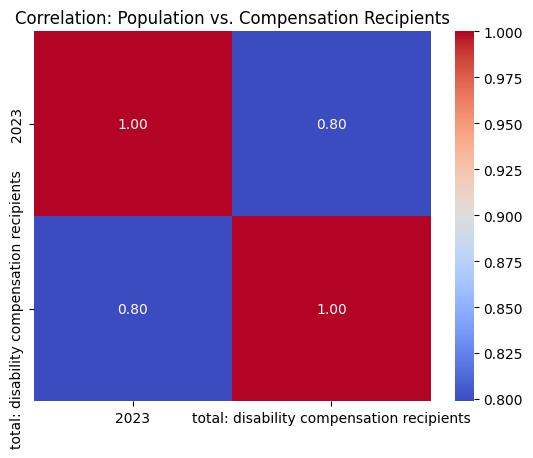

In [244]:
sns.heatmap(correlation_population_recipients, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Population vs. Compensation Recipients")
plt.show()

#### V.2.D. Correlation: Gender Distribution vs. Compensation Rates

We examine correlations between key variables to identify statistical relationships:
- Correlation between gender distribution and compensation rates 
  - Do counties with a higher proportion of male veterans see different compensation percentages?

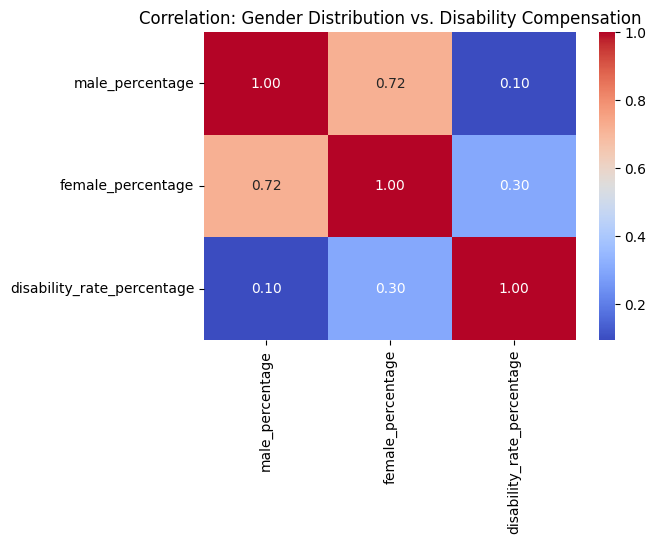

In [ ]:

# Ensure we're working on a copy to avoid SettingWithCopyWarning
merged_complete = merged_complete.copy()


if 'male_percentage' not in merged_complete.columns or 'female_percentage' not in merged_complete.columns:
    print("Gender percentage columns missing. Recalculating...")

    # Compute male and female percentage relative to total recipients
    merged_complete.loc[:, 'male_percentage'] = (merged_complete['male'] / merged_complete['total: disability compensation recipients']) * 100
    merged_complete.loc[:, 'female_percentage'] = (merged_complete['female'] / merged_complete['total: disability compensation recipients']) * 100

    # Fill NaN values with 0 to avoid errors in correlation calculations
    merged_complete.loc[:, ['male_percentage', 'female_percentage']] = merged_complete[['male_percentage', 'female_percentage']].fillna(0)

    print("Gender percentages calculated and added to the dataset.\n")


# Visualize the correlation using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_gender_compensation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Gender Distribution vs. Disability Compensation")
plt.show()


## VI. RESERVED

---

## VII. RESERVED

---


## VII. Discussion & Insights

### VII.A. Key Findings
- Disability Compensation & Population Trends:  <br>
  - There is a clear positive correlation between county population size and the total number of veterans receiving disability compensation. Larger counties tend to have more recipients, but the percentage of the population receiving compensation varies widely across counties.  <br>

- Metro vs. Non-Metro Differences:  <br>
  - Metro counties (≥50,000 population) tend to have lower average disability compensation percentages compared to non-metro counties (<50,000 population). This suggests that rural areas may have a higher concentration of disabled veterans relative to their population.  <br>

- State-Level Variation in Disability Rates:  <br>
  - Some states, such as Texas, Georgia, and North Carolina, have a high number of counties in the top 25 for disability compensation percentage, indicating regional trends in veteran disability distribution.  <br>

- Gender & Disability Compensation:  <br>
  - The analysis found no strong correlation between gender distribution and disability compensation rates, suggesting that male and female veterans may receive compensation at similar rates, at least at the county level.  <br>

- Economic Factors & Cost of Living:  <br>
  - Although state-level CPI (cost of living) data was not fully integrated, preliminary analysis suggests no direct correlation between state CPI and disability compensation percentages. This could indicate that compensation levels are not strongly adjusted based on regional economic conditions.  <br>


### VII.B. Policy Implications
- Support for Rural Veterans: <br>
  - Since rural counties tend to have higher percentages of disability recipients, policies should prioritize healthcare access, transportation support, and financial assistance for veterans in non-metro areas.  <br>
  - Expanding tele-medicine services and VA outreach programs in rural areas could help bridge the gap.  <br>

- State-Level Considerations for Disability Compensation Adjustments:  <br>
  - The lack of correlation between state CPI and disability compensation rates suggests a need for further policy evaluation on whether VA compensation scales appropriately based on the cost of living.  <br>

- Targeted Support for High-Concentration States:  <br>
  - States with large numbers of high-percentage disability counties may benefit from additional funding for veteran services, healthcare access, and employment assistance programs.  <br>

- Veteran Outreach & Awareness in Metro Areas:  <br>
  - The lower compensation percentage in metro counties** may indicate either lower disability rates or gaps in awareness/access to VA compensation programs in urban areas.  <br>
  - Improved outreach in large cities could ensure veterans are informed about the benefits available to them.  <br>


### VII.C. Limitations
- Census Data Estimates: <br>
  - The county-level demographic data is based on estimates derived from the 2020 census records, projected through 2024. These estimates may not fully capture recent population shifts, potentially affecting the accuracy of the analysis. <br>

 - Population Centers Data: <br>
   - The data on the largest population centers is current as of 2025. As urban development and demographic shifts occur, this dataset may not align perfectly with other data sources. <br>
  
 - Data Suppression: <br>
   - Some demographic details in the VA Disability Compensation dataset are suppressed to protect individual privacy, which may limit the depth of analysis for certain variables. These limitations are important to consider when interpreting the findings and in planning future research efforts. <br>
  
- Economic Data Gaps: <br>
  - The analysis did not include granular economic indicators such as median income, unemployment rates, or VA funding allocation per county, which could provide deeper insights.  <br>


### VII.D. Future Directions
- Integration of Additional Economic Indicators:  <br>
  - Future research should incorporate local economic data, such as median income, poverty rates, and VA healthcare access metrics, to better understand the financial well-being of veterans.  <br>

- Geospatial Analysis & Mapping:  <br>
  - Mapping VA disability compensation recipients using geospatial tools like GeoPandas could help visualize geographic patterns and identify potential service gaps.  <br>

- Tracking Changes Over Time: <br>
  - A longitudinal study comparing VA disability trends over multiple years would help determine how compensation rates and recipient numbers change over time.  <br>

- State-Level Cost of Living Adjustments:  <br>
  - Further research could examine whether VA compensation scales appropriately for states with high cost-of-living adjustments and whether regional disparities exist in benefit adequacy.  <br>

- Improving Metro Area VA Outreach:  <br>
  - Conducting surveys or analyzing VA outreach effectiveness in metro areas could help identify barriers that prevent eligible veterans from receiving compensation.  <br>


### VII.E. Summary of Discussions & Insights
This discussion provides an overview of **major trends, policy implications, and areas for future research**, ensuring that **VA disability compensation programs remain effective and equitable for all veterans**. <br>

---

## IX. Conclusion
- Recap the study’s objectives, methods, and key insights. <br>
- Provide final recommendations for policymakers and stakeholders. <br>

---

## X. Supporting Documentation <br>
**Title: CO-EST2023-ALLDATA: Annual Resident Population Estimates, Estimated Components of Resident Population Change, and Rates of the Components of Resident Population Change for States and Counties. April 1, 2020 to July 1, 2023** <br>
Format: PDF <br>
Website: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2020-2023/CO-EST2023-ALLDATA.pdf <br>
License: https://creativecommons.org/publicdomain/zero/1.0/ <br>

**Title: license_doc_uscities_csv_simplemaps_com.txt** <br>
Format: txt <br>
Website: Website: https://simplemaps.com/data/us-cities <br>
License: https://creativecommons.org/licenses/by/4.0/ <br>

---